Traffic safety dataset.

This dataset was downloaded from the US department of transportation. 

The original dataset was 90,000 rows, so I trimmed it down to 20,000 rows for purposes of speed. 
From these 20,000 rows, 1000 random rows were selected.

The longitudinal and latitudinal coordinates were provided, but there was no city column, so I used the geocoder library to convert these values to a city/AREA column.

A new category, "Group" was also created to simplify the SEVERITY column. This was divided into UPPER/MED/LOWER values.

Based on the month in which the accident occured, I then created a column for SEASON, which was not provided.

Matplotlib was then used to cast the individual cities, based on their severity, and season, into subplots.

PRACTICAL APPLICATION

Insurance companies, or trucking companies can use a model like this to forecast risks, and anticipate accidents in various areas based on certain values plugged into this model.

ANTICIPATED WEAKNESSES

This model does not include factors such as the type of vehicle involved, the condition/age of the driver. These would strengthen the accuracy of the model.

One could run this several times to gather data through a continuous stream through several randomization processes, and query a specific city in various regions. 

In [128]:
import pandas as pd
import numpy as np
import geocoder
import datetime
import matplotlib.pyplot as plt
import matplotlib as mp

FUNCTION FOR GETTING LONGITUDE AND LATITUDE, returns CITY value from json format.

In [129]:
def geo_rev(x,y):
    g = geocoder.osm([x, y], method='reverse').json
    # if g:
    #     return g.get('city')
    # else:
    #     return 'no city'
    if (g != ''): return g.get('city')

FUNCTION FOR DISPLAYING DATA

In [146]:
def show_data(data,title, x_data, y_data, subtitle, nrow, ncol, sub_data):
    
    fig, axes = plt.subplots(nrow, ncol)
    
    plt.suptitle(title,y=1.4,x=1.2)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2.2, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
   
    
    #plot counter
    count=0
    for r in range(nrow):
        
        for c in range(ncol):

            data[count].plot(x=x_data, y=y_data,ax=axes[r,c],title=f'{subtitle} {sub_data[count]}')
            
            count+=1
            
    for ax in fig.axes: #Adjust labels
        mp.pyplot.sca(ax)
        plt.xticks(rotation=45)
    
###################################################################################



FUNCTIONS FOR CONVERTING DATE VALUE TO MONTH VALUE, and stripping time value.

In [4]:
def get_month(y):
    y-=1
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
    
    return months[y]
    
           

EXTRACT THE DATA

In [5]:
df = pd.read_csv('us_accidents_dec21.csv')


GET DIMENSIONS OF THE DATA - I truncated the file to 20,000 rows, rather than the original 96,000

In [6]:
df.shape

(20000, 48)

Show sample of data

In [7]:
df.head(10)

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2397454,A-2397455,2,2019-12-18 19:56:00,2019-12-18 20:49:46,34.136524,-117.565862,34.136524,-117.565862,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
1,1475923,A-1475924,2,2021-09-22 06:23:00,2021-09-22 06:33:30,30.352358,-81.668551,30.345329,-81.668322,0.486,...,False,False,False,False,False,False,Night,Night,Day,Day
2,2306229,A-2306230,2,2020-01-18 00:13:00,2020-01-18 03:26:10,44.982230,-93.243410,44.982230,-93.243410,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
3,209885,A-209886,2,2017-07-06 16:36:20,2017-07-06 22:36:20,25.900910,-80.324550,25.898410,-80.334220,0.625,...,False,False,False,False,False,False,Day,Day,Day,Day
4,1472368,A-1472369,2,2021-11-14 12:59:00,2021-11-14 14:34:30,38.081670,-112.679761,38.124790,-112.632191,3.945,...,False,False,False,False,False,False,Day,Day,Day,Day
5,2569729,A-2569730,2,2018-11-03 11:33:44,2018-11-03 12:03:22,26.057930,-80.162510,26.062310,-80.163390,0.308,...,False,False,False,False,False,False,Day,Day,Day,Day
6,2462139,A-2462140,2,2019-09-30 16:09:00,2019-09-30 16:41:03,33.719775,-117.795048,33.719775,-117.795048,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
7,1704770,A-1704771,2,2021-02-16 13:47:46,2021-02-16 20:32:00,45.643719,-121.925314,45.656469,-121.900474,1.488,...,False,False,False,False,False,False,Day,Day,Day,Day
8,2485503,A-2485504,2,2019-09-05 12:01:00,2019-09-05 12:34:33,33.961586,-118.369524,33.961586,-118.369524,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
9,2337471,A-2337472,2,2020-02-12 18:12:00,2020-02-12 19:25:05,43.952760,-92.083350,43.955030,-92.120950,1.877,...,False,False,False,False,False,False,Night,Night,Day,Day


In [8]:
# For sake of time, I am limiting the sample to 1000 of the original. The sample() method does not work well with this
# so I built my own for this. I constructed a list without duplicates to avoid duplicate rows being carried over.
import random

# data = []
# l = random.sample(range(20000), 1000) # create a randomized list

# for i in l: #adjust l to modulate sample size
    
#     data.append(df.iloc[i])

# df1 = pd.DataFrame(data)   

df1 = df.sample(1000)


In [9]:
df1.head() #a new randomized data frame has now been created out of the original data

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
11362,2825165,A-2825166,3,2019-07-11 19:43:01,2019-07-11 20:11:57,39.388369,-76.529927,39.388542,-76.530294,0.023,...,False,False,False,False,False,False,Day,Day,Day,Day
9806,1526431,A-1526432,2,2021-01-08 14:37:00,2021-01-08 17:52:41,37.187722,-121.003402,37.187685,-121.012671,0.510,...,False,False,False,False,False,False,Day,Day,Day,Day
4032,1378825,A-1378826,2,2021-12-31 14:42:16,2021-12-31 16:48:57,40.696481,-74.369941,40.676511,-74.402251,2.184,...,False,False,False,False,False,False,Day,Day,Day,Day
13410,2448917,A-2448918,2,2019-11-06 13:35:00,2019-11-06 14:29:16,34.026222,-117.333453,34.026222,-117.333453,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
12377,1114207,A-1114208,2,2021-11-05 12:49:00,2021-11-05 14:53:24,37.299740,-120.491579,37.299714,-120.491508,0.004,...,False,False,False,False,False,False,Day,Day,Day,Day


THIS BLOCK FETCHES THE CITY BASED ON THE LATIDUDINAL AND LONGITUDINAL COORDINATES 

In [10]:
df1.insert(4, "Area", "")
c = 0 # Counter for indexing

for i,f in zip(df1.Start_Lat, df1.Start_Lng):    
    df1['Area'].iloc[c] = geo_rev(i,f)
    c+=1
              

/var/folders/79/y1kk4mzj387ckxj5f0f4hsjw0000gn/T/ipykernel_18826/2070947478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Area'].iloc[c] = geo_rev(i,f)


In [11]:
#Drop city values where there are none.

df1 = df1[pd.notnull(df1['Area'])]

In [12]:
df1.shape

(457, 49)

In [13]:
df1 = df1.drop(['Start_Lat','Start_Lng','End_Lat','End_Lng'],axis=1) #Drop superfluous columns

In [14]:
df1.head(5)

,Unnamed: 0,ID,Severity,Start_Time,Area,End_Time,Distance(mi),Description,Number,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
13410,2448917,A-2448918,2,2019-11-06 13:35:00,Grand Terrace,2019-11-06 14:29:16,0.000,At La Cadena Dr/Iowa Ave - Accident.,NaN,I-215 N,...,False,False,False,False,False,False,Day,Day,Day,Day
12377,1114207,A-1114208,2,2021-11-05 12:49:00,Merced,2021-11-05 14:53:24,0.004,Accident on R St (CA-99) from CA-59/Martin Lut...,NaN,CA-99 S,...,False,False,False,False,False,False,Day,Day,Day,Day
11266,289566,A-289567,2,2021-03-11 09:00:31,Raleigh,2021-03-11 10:42:08,0.105,Incident on SIX FORKS RD near RENWICK CT Drive...,7926.0,Six Forks Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
14683,670562,A-670563,2,2021-04-15 16:25:21.000000000,Hialeah,2021-04-15 17:44:21.000000000,0.124,Incident on E 10TH ST near E 4TH AVE Drive wit...,301.0,E 10th St,...,False,False,False,False,False,False,Day,Day,Day,Day
8005,70582,A-70583,4,2016-08-10 06:20:15,New York,2016-08-10 12:20:15,0.874,Closed between Exit 13 and Robinson/Union/Exit...,NaN,Grand Central Pkwy E,...,False,False,False,False,False,False,Day,Day,Day,Day


Here I want to create 3 bins for levels of severity.

In [15]:
high = df1['Severity'].max()
med = df1['Severity'].mean()
min = df1['Severity'].min()

high = int(high)
print('Highest Severity: ',high)
med = int(med)
print('Median Severity: ',med)
min = int(min)
print('Lowest Severity: ',min)

Highest Severity:  4
Median Severity:  2
Lowest Severity:  1


In [16]:
df1.insert(2, "Group", "")
c = 0

#df1.Severity = df1.Severity.astype(int)

for i in df1['Severity']:
    i = int(i)
    if (i == 4): df1['Group'].iloc[c] = 'Upper' 
    if (i == 1): df1['Group'].iloc[c] = 'Lower'
    if (i == 2): df1['Group'].iloc[c] = 'Median'
    if (i == 3): df1['Group'].iloc[c] = 'Median'
    
    c+=1

   

/var/folders/79/y1kk4mzj387ckxj5f0f4hsjw0000gn/T/ipykernel_18826/4267502996.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if (i == 2): df1['Group'].iloc[c] = 'Median'
/var/folders/79/y1kk4mzj387ckxj5f0f4hsjw0000gn/T/ipykernel_18826/4267502996.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if (i == 4): df1['Group'].iloc[c] = 'Upper'
/var/folders/79/y1kk4mzj387ckxj5f0f4hsjw0000gn/T/ipykernel_18826/4267502996.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

Here, based on the date, I want to create a category for different seasons to simplify the risk matrix.
Change_Month() function will be used here. This value will be added to a new column "Month"

Then, a new column will be created for each season based on this value.

In [17]:
c = 0 # Counter for indexing
df1.insert(2,"Month","")


for i in df1['Start_Time']:
    i = str(i) # These two lines are for isolating only part of the date/time column
    i = i[5:7]
    i = int(i) # pass i to get_month as int, not string
    df1['Month'].iloc[c] = get_month(i) 
    c+=1


/var/folders/79/y1kk4mzj387ckxj5f0f4hsjw0000gn/T/ipykernel_18826/80138461.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'].iloc[c] = get_month(i)


In [18]:
df1.head(5)

,Unnamed: 0,ID,Month,Group,Severity,Start_Time,Area,End_Time,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
13410,2448917,A-2448918,Nov,Median,2,2019-11-06 13:35:00,Grand Terrace,2019-11-06 14:29:16,0.000,At La Cadena Dr/Iowa Ave - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
12377,1114207,A-1114208,Nov,Median,2,2021-11-05 12:49:00,Merced,2021-11-05 14:53:24,0.004,Accident on R St (CA-99) from CA-59/Martin Lut...,...,False,False,False,False,False,False,Day,Day,Day,Day
11266,289566,A-289567,Mar,Median,2,2021-03-11 09:00:31,Raleigh,2021-03-11 10:42:08,0.105,Incident on SIX FORKS RD near RENWICK CT Drive...,...,False,False,False,False,False,False,Day,Day,Day,Day
14683,670562,A-670563,Apr,Median,2,2021-04-15 16:25:21.000000000,Hialeah,2021-04-15 17:44:21.000000000,0.124,Incident on E 10TH ST near E 4TH AVE Drive wit...,...,False,False,False,False,False,False,Day,Day,Day,Day
8005,70582,A-70583,Aug,Upper,4,2016-08-10 06:20:15,New York,2016-08-10 12:20:15,0.874,Closed between Exit 13 and Robinson/Union/Exit...,...,False,False,False,False,False,False,Day,Day,Day,Day


This block creates a new column "Season" and changes the Months and reduces the months to the time of year.
To reduce the skew in this, one might also create Late/Early winter, since not all winter months are created equal.

In [19]:
df1.insert(2, "Season", "")
c = 0


#Define each season in a list
winter = ['Dec','Jan','Feb']
spring = ['Mar','Apr','May']
summer = ['Jun','Jul','Aug']
fall =   ['Sept','Oct','Nov']

for i in df1.Month:
    
    
    for j in winter:
        if (i == j): df1['Season'].iloc[c] = "Winter"
        
    for j in spring:
        if (i == j): df1['Season'].iloc[c] = "Spring"
        
    for j in summer:
        if (i == j): df1['Season'].iloc[c] = "Summer"
        
    
    for j in fall:
        if (i == j): df1['Season'].iloc[c] = "Fall"
        
    
    c+=1

/var/folders/79/y1kk4mzj387ckxj5f0f4hsjw0000gn/T/ipykernel_18826/690141005.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if (i == j): df1['Season'].iloc[c] = "Fall"
/var/folders/79/y1kk4mzj387ckxj5f0f4hsjw0000gn/T/ipykernel_18826/690141005.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if (i == j): df1['Season'].iloc[c] = "Spring"
/var/folders/79/y1kk4mzj387ckxj5f0f4hsjw0000gn/T/ipykernel_18826/690141005.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [20]:
df1.sample(10)

,Unnamed: 0,ID,Season,Month,Group,Severity,Start_Time,Area,End_Time,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
14741,2168705,A-2168706,Summer,Jun,Median,2,2020-06-12 18:18:16,Charlotte,2020-06-12 18:33:16,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
14814,1815187,A-1815188,Fall,Nov,Median,2,2020-11-17 19:42:00,Sacramento,2020-11-18 01:59:30,1.973,...,False,False,False,False,False,False,Night,Night,Night,Night
17640,1343331,A-1343332,Winter,Dec,Median,2,2021-12-11 00:50:42,Saint Paul,2021-12-11 03:40:55,0.812,...,False,False,False,False,False,False,Night,Night,Night,Night
15193,678526,A-678527,Winter,Dec,Median,2,2021-12-13 19:52:27,Houston,2021-12-14 01:19:28,0.031,...,False,False,False,False,False,False,Night,Night,Night,Night
535,537058,A-537059,Fall,Nov,Median,2,2021-11-13 11:21:00,Sarasota,2021-11-13 12:36:58,0.054,...,False,False,False,False,False,False,Day,Day,Day,Day
5547,1800829,A-1800830,Winter,Dec,Median,2,2020-12-19 00:26:00,Alexandria,2020-12-19 03:26:00,0.687,...,False,False,False,False,False,False,Night,Night,Night,Night
1259,218443,A-218444,Summer,Jul,Upper,4,2017-07-16 04:17:16,Tampa,2017-07-16 10:17:16,1.271,...,False,False,False,False,False,False,Night,Night,Night,Night
18748,118298,A-118299,Fall,Nov,Median,2,2016-11-30 06:53:53,Riverside,2016-11-30 12:53:53,0.320,...,False,False,False,False,False,False,Day,Day,Day,Day
612,671598,A-671599,Winter,Dec,Median,2,2021-12-12 09:52:00,Oakland,2021-12-12 11:31:10,0.606,...,False,False,False,False,False,False,Day,Day,Day,Day
18064,2208474,A-2208475,Spring,Mar,Median,2,2020-03-19 07:47:00,Riverside,2020-03-19 09:08:17,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


In [21]:
df1.loc[df1['Group'] == "Median"].count()

Unnamed: 0               443
ID                       443
Season                   443
Month                    443
Group                    443
Severity                 443
Start_Time               443
Area                     443
End_Time                 443
Distance(mi)             443
Description              443
Number                   139
Street                   443
Side                     443
City                     443
County                   443
State                    443
Zipcode                  443
Country                  443
Timezone                 443
Airport_Code             441
Weather_Timestamp        436
Temperature(F)           433
Wind_Chill(F)            362
Humidity(%)              433
Pressure(in)             435
Visibility(mi)           433
Wind_Direction           434
Wind_Speed(mph)          416
Precipitation(in)        341
Weather_Condition        434
Amenity                  443
Bump                     443
Crossing                 443
Give_Way      

In [22]:
df2 = df1[['Area', 'Severity','Season']].copy()

In [23]:
df2.head()

,Area,Severity,Season
13410,Grand Terrace,2,Fall
12377,Merced,2,Fall
11266,Raleigh,2,Spring
14683,Hialeah,2,Spring
8005,New York,4,Summer


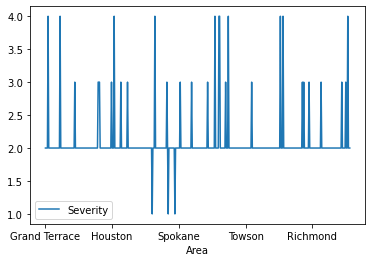

In [24]:
axes = plt.gca()
df2.plot(x='Area', y='Severity',ax=axes);

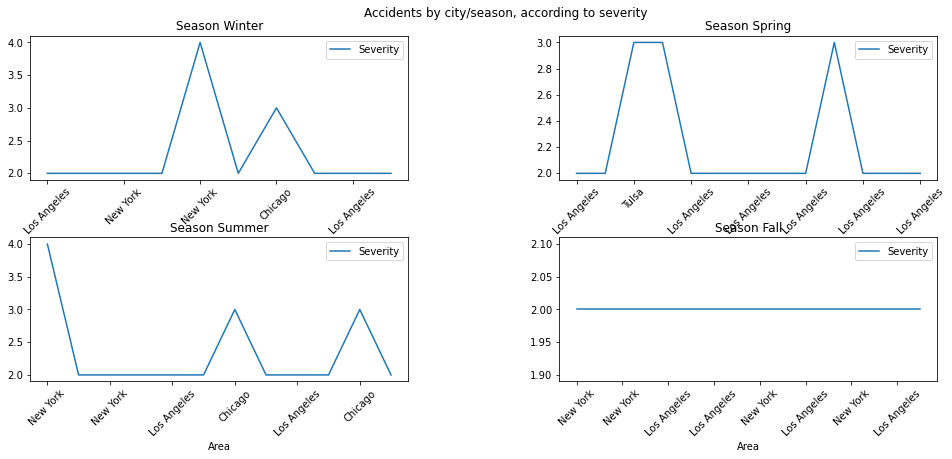

In [147]:
seasons = ['Winter','Spring','Summer','Fall']
cities = ['Los Angeles','Chicago','New York','Tulsa']

#The data is too noisy to view with all the cities, so I will limit this to a sample size of select cities


df8 = [] #Open an empty dataframe

df8 = df2.loc[df2['Area'].isin(cities)].copy() #only get rows where cities obtains
#rslt_df = dataframe.loc[~dataframe['Stream'].isin(options)]
df8[df8.duplicated(keep=False)]


df3 = df8[['Severity','Season','Area']].copy()
df3 = df3.loc[df2['Season'] == 'Winter']

df4 = df8[['Severity','Season','Area']].copy()
df4 = df4.loc[df2['Season'] == 'Spring']

df5 = df8[['Severity','Season','Area']].copy()
df5 = df5.loc[df2['Season'] == 'Summer']
           
df6 = df8[['Severity','Season','Area']].copy()
df6 = df6.loc[df2['Season'] == 'Fall']           


#df.loc[df['col1'] == value]

# make a list of all dataframes 
df_list = [df3, df4, df5, df6]


show_data(df_list,
          'Accidents by city/season, according to severity'
          ,'Area', 'Severity', 
          'Season', 2, 2, seasons)

#where (df1 ("NUMBER"] == df2[ "NUMVALUE"))

## 